# Software Coaching for Python
# Week 6: Project Presentation

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/SW_Coaching_for_Python"
my_folder = "HCJ"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome/Final_Proj"
classdata_folder = f"{path}/classdata"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Executive Summary

### Name

제해찬

### Target Web Site

Investing.com: https://www.investing.com/

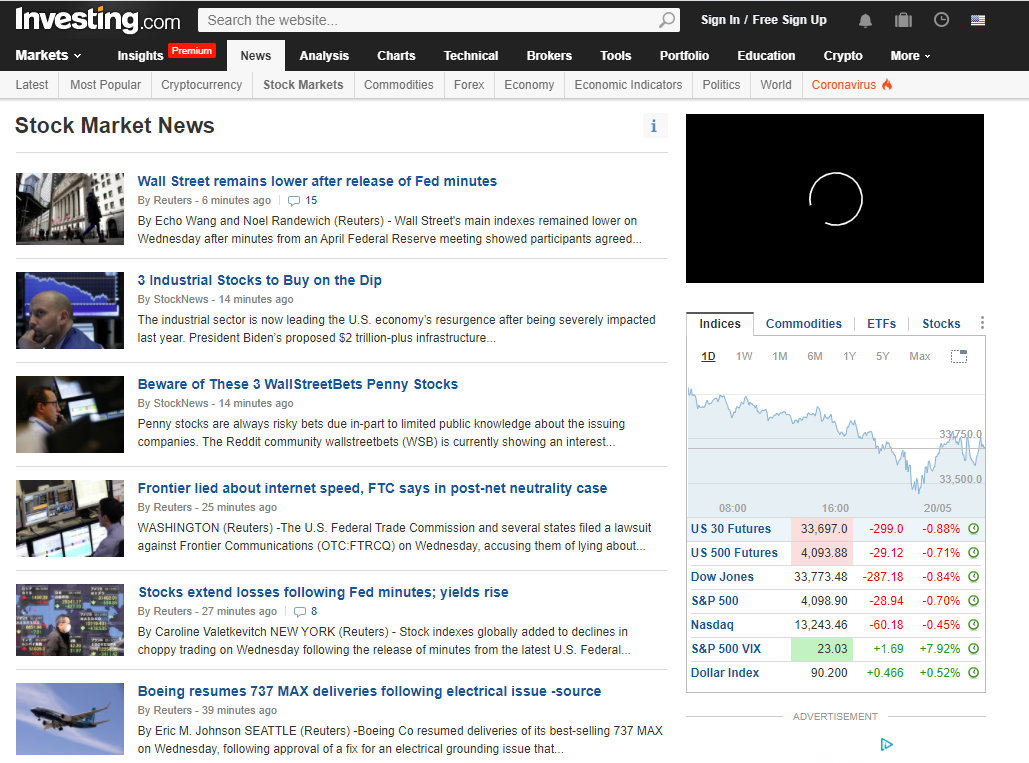

In [ ]:
from IPython.display import Image
Image(f"{outcome_folder}/capture1.PNG")

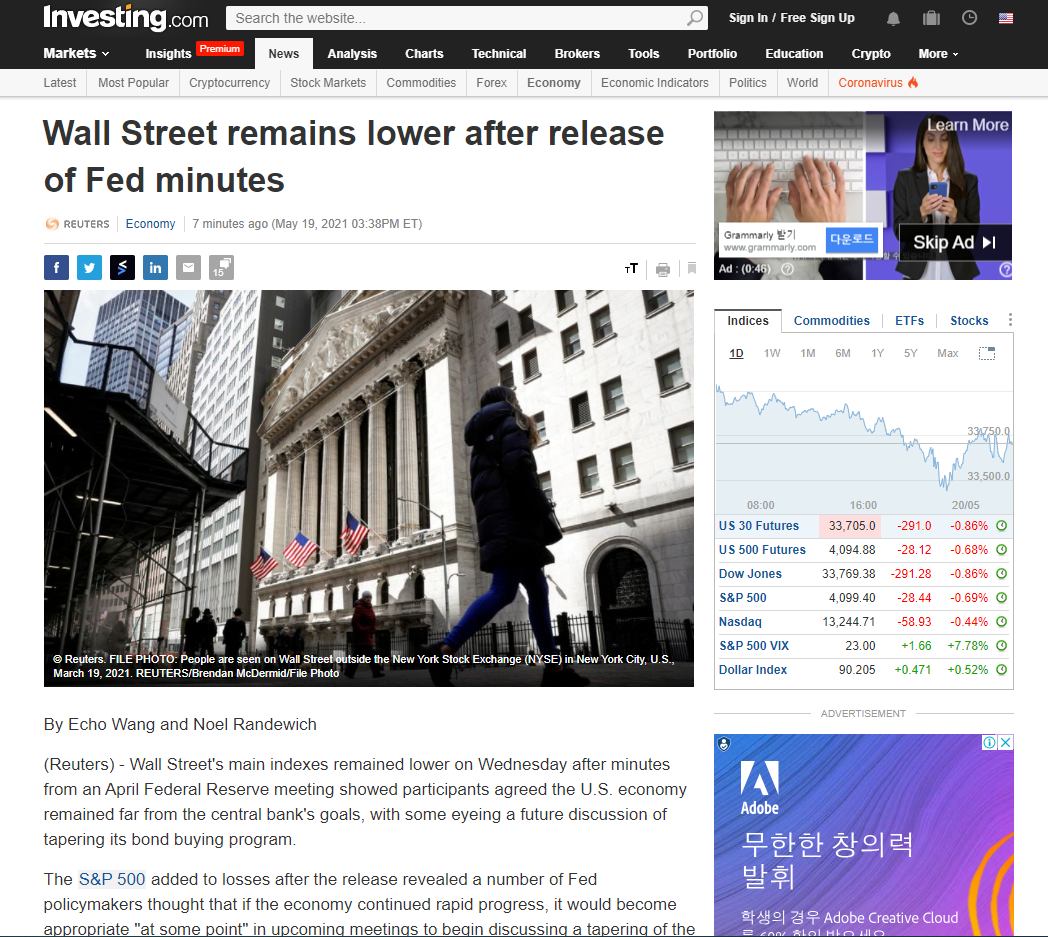

In [ ]:
Image(f"{outcome_folder}/capture2.PNG")

### Reasons Why I Chose the Web Site

Investing.com은 여러 언론사의 주식 시장과 관련된 기사들을 한 곳에 모아 제공하기 때문에 다양하고 많은 정보를 얻을 수 있을 것이라고 생각하여 해당 사이트를 선택하게 되었음.

### Total Number of Web Articles Collected

3,444 건

### Data Time Range

2021-05-01 - 2021-05-06 (1주일)

### Key Findings and Lessons

- 5월 초에 수집된 데이터이기에 1분기 실적 및 전월 주가 동향에 관한 내용들이 많았음. 90%가 넘는 기사들이 5월 1일에 작성되었음.
- 앞으로의 주가 및 경제 상황에 대한 예측을 담고 있는 단어들이 많이 나타남.

### Major Challenges

- 세계 경제의 전반적인 이슈들을 파악하고 있어야 키워드들이 무엇을 뜻하는지 알 수 있기에 이 점이 가장 힘들었음.
- 주식 시장이라는 특정 주제와 관련된 기사들만 모아 분석하다보니 stopword인지 유의미한 키워드인지 판단이 힘든 단어들이 많이 발생하였음.
- 데이터가 수집된 기간이 짧았기에 특정 주제와 관련된 기사들만 수집되었음. 따라서 클러스터 분석 시 결과가 한 클러스터에 집중되어 나타남.

### Future Work

- time range를 확장하여 기간별 keyword를 분석해보는 것이 필요하다 생각됨. (time range가 1주일로 너무 짧았음)
- index, oil 등과 같은 단어는 중요한 단어이나 부가적인 설명이 필요함(oil 수요가 증가한다와 같은). 이를 명확하게 밝혀낼 수 있으면 더 의미있는 분석이 가능할 수 있을거라 생각됨.
- low, high와 같은 단어는 상황에 따라 긍정적으로 해석될 수도, 부정적으로 해석될 수도 있기에 이를 더 정확히 한다면 좋은 분석이 될 수 있을 것이라 생각함.

## Installing Necessary Packages

In [ ]:
! pip install --user nltk scikit-learn pyldavis textblob

## Loading Data

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv(f"{outcome_folder}/proj.csv", sep="\t")
df = df.dropna(subset=["TITLE", "BODY"], axis=0)
df.datetime = df.DATE.astype("datetime64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3444 entries, 0 to 3443
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     3444 non-null   object
 1   TITLE   3444 non-null   object
 2   SITE    3444 non-null   object
 3   DATE    3444 non-null   object
 4   BODY    3444 non-null   object
 5   AUTHOR  1791 non-null   object
dtypes: object(6)
memory usage: 188.3+ KB


In [ ]:
df.head(10)

,URL,TITLE,SITE,DATE,BODY,AUTHOR
0,https://www.investing.com/news/stock-market-news/air-franceklm-operating-loss-widens-as-european-recovery-lags-2497281,Air France-KLM operating loss widens as European recovery lags,Reuters,"May 06, 2021 04:45AM","Air France-KLM sales are showing little sign so far of a travel upturn it still hopes to see by summer, the airline group said on Thursday, as it ...",Laurence Frost
1,https://www.investing.com/news/stock-market-news/aston-martin-posts-smaller-firstquarter-loss-2497267,Aston Martin posts smaller loss as sales more than double,Reuters,"May 06, 2021 02:46AM",Carmaker Aston Martin posted a smaller first quarter loss in 2021 of 42.2 million pounds ($59 million) and said it continued to take steps towards...,NaN
2,https://www.investing.com/news/stock-market-news/rebound-in-trading-boosts-earnings-at-frances-socgen-2497280,Rebound in trading boosts earnings at France's SocGen,Reuters,"May 06, 2021 06:01AM",Societe Generale will press ahead with an overhaul of its investment bank after its equities division posted its best performance in six years in ...,"Matthieu Protard, Marc Angrand"
3,https://www.investing.com/news/stock-market-news/arcelormittal-beats-estimates-after-very-positive-start-to-year-2497242,ArcelorMittal reports best start to a year for a decade,Reuters,"May 06, 2021 08:49AM","ArcelorMittal, the world's largest steelmaker, reported higher than expected first-quarter earnings on Thursday after what it said was its stronge...",Marine Strauss
4,https://www.investing.com/news/stock-market-news/britains-next-raises-profit-outlook-for-second-time-in-two-months-2497266,Britain's Next raises profit outlook for second time in two months,Reuters,"May 06, 2021 04:56AM",British fashion retailer Next raised its full-year profit guidance for the second time in two months as it reported better than expected first-qua...,James Davey
5,https://www.investing.com/news/economy/boosted-by-premium-car-demand-volkswagen-raises-margin-target-2497244,Volkswagen lifts margin target on demand for premium cars,Reuters,"May 06, 2021 06:52AM","Volkswagen (DE:VOWG_p) boss Herbert Diess said Europe's top carmaker was in ""crisis mode"" over an ongoing lack of badly needed automotive chips, a...","Christoph Steitz, Jan Schwartz"
6,https://www.investing.com/news/stock-market-news/ab-inbev-ceo-brito-to-step-down-succeeded-by-north-america-chief-2497235,"AB InBev CEO Brito to step down, North America chief steps in",Reuters,"May 06, 2021 04:06AM","Carlos Brito, who built Anheuser-Busch InBev into the world's biggest brewer during 15 years at the helm, will step down as CEO in July to be repl...",Philip Blenkinsop
7,https://www.investing.com/news/stock-market-news/stellantis-nv-earnings-revenue-beat-in-q1-2497264,"Stellantis NV Earnings, Revenue Beat in Q1",Investing.com,"May 06, 2021 02:19AM",Stellantis NV reported on Wednesday first quarter earnings that beat analysts' forecasts and revenue that topped expectations. Stellantis NV anno...,NaN
8,https://www.investing.com/news/stock-market-news/exclusive-chinas-tencent-in-talks-with-us-to-keep-gaming-investments--sources-2497066,Exclusive: China's Tencent in talks with U.S. to keep gaming investments - sources,Reuters,"May 06, 2021 02:58AM",Tencent Holdings (OTC:TCEHY) Ltd is negotiating agreements with a U.S. national security panel that would allow it to keep its ownership stakes in...,"Echo Wang, Greg Roumeliotis"
9,https://www.investing.com/news/stock-market-news/european-stock-futures-edge-higher-socgen-unicredit-1q-in-focus-2497256,"European Stock Futures Edge Higher; SocGen, Unicredit 1Q in Focus",Investing.com,"May 06, 2021 02:00AM","European stock markets are seen edging higher at the open, continuing the positive tone from the previous session, as investors digest more corpor...",Peter Nurse


In [ ]:
df.tail(10)

,URL,TITLE,SITE,DATE,BODY,AUTHOR
3434,https://www.investing.com/news/stock-market-news/norwegian-air-makes-final-restructuring-offer-to-creditors-2443487,Norwegian Air makes final restructuring offer to creditors,Reuters,"May 01, 2021 12:00AM",Norwegian Air submitted its final restructuring offer to creditors on Thursday in what the budget airline said was a major step in its plan to sla...,NaN
3435,https://www.investing.com/news/stock-market-news/european-stocks-largely-higher-as-ecb-meeting-nears-2443467,European Stocks Largely Higher as ECB Meeting Nears,Investing.com,"May 01, 2021 04:08PM","European stock markets edged largely higher Thursday, boosted by the final approval of the massive U.S. Covid-19 stimulus package ahead of the Eur...",Dhirendra Tripathi
3436,https://www.investing.com/news/stock-market-news/queue-to-quaff-pandemic-poses-problems-for-swedens-state-booze-monopoly-2443455,Queue to quaff? Pandemic poses problems for Sweden's state booze monopoly,Reuters,"May 01, 2021 12:00AM","On a chilly Saturday in central Stockholm, around 150 people queue on a street, squinting into the low sun, checking their watches and hoping to m...","Nikolaj Skydsgaard, Jacob Gronholt-Pedersen"
3437,https://www.investing.com/news/stock-market-news/australia-stocks-lower-at-close-of-trade-spasx-200-down-000-2443426,Australia stocks lower at close of trade; S&P/ASX 200 down 0.00%,Investing.com,"May 01, 2021 04:08PM","Australia stocks were lower after the close on Thursday, as losses in the IT, Financials and Utilities sectors led shares lower. At the close in S...",NaN
3438,https://www.investing.com/news/stock-market-news/japan-stocks-higher-at-close-of-trade-nikkei-225-up-060-2443416,Japan stocks higher at close of trade; Nikkei 225 up 0.60%,Investing.com,"May 01, 2021 04:08PM","Japan stocks were higher after the close on Thursday, as gains in the Paper & Pulp, Railway & Bus and Real Estate sectors led shares higher. At th...",Clodagh Kilcoyne
3439,https://www.investing.com/news/stock-market-news/tesla-raises-price-of-variants-of-model-y-model-3-model-s-2443413,"Tesla raises price of variants of Model Y, Model 3, Model S",Reuters,"May 01, 2021 12:00AM","Tesla (NASDAQ:TSLA) Inc has increased price of its Model Y Long Range and Model S Plaid plus by $10,000, the electric-car maker's website showed. ...",NaN
3440,https://www.investing.com/news/stock-market-news/european-stock-futures-higher-ecb-meeting-looms-large-2443406,European Stock Futures Higher; ECB Meeting Looms Large,Investing.com,"May 01, 2021 04:08PM","European stock markets are seen opening marginally higher Thursday, boosted by the final approval of the U.S. Covid-19 stimulus package, but with ...","Chibuike Oguh, Joshua Franklin, Joyce Lee"
3441,https://www.investing.com/news/technology-news/analysis-riding-gamestops-resurgent-rally--not-for-the-faint-of-heart-2443374,Analysis: Riding GameStop's resurgent rally - 'not for the faint of heart',Reuters,"May 01, 2021 12:00AM","Joe Youngblood, who works in digital marketing in Dallas, Texas, bought his first share of GameStop (NYSE:GME) at $98 in early February and found ...","Shariq Khan, Siddharth Cavale"
3442,https://www.investing.com/news/stock-market-news/hsbc-toughens-stance-on-fossil-fuel-funding-after-shareholder-heat-2443341,HSBC toughens stance on fossil fuel funding after shareholder heat,Reuters,"May 01, 2021 12:00AM","HSBC will phase out its support for the coal industry in the developed world by 2030 and in the developing world by 2040, the bank said on Thursda...",NaN
3443,https://www.investing.com/news/stock-market-news/asian-stocks-up-as-weakerthanexpected-us-inflation-calm-inflation-worries-2443329,Asian Stocks Up as Weaker-Than-Expected U.S. Inflation Calm Worries,Investing.com,"May 01, 2021 04:08PM","Asia Pacific stocks were mostly up Thursday morning, continuing to rebound from two-week lows after weaker-than-expected inflation data calmed inf...","Thyagaraju Adinarayan, Sujata Rao"


## Popular Keywords Ranking

In [ ]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

df["words"] = df.BODY.apply(lambda x: nltk.word_tokenize(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

In [ ]:
df

In [ ]:
from collections import Counter

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            if word in stopwords:
                continue
            if target_tag is None:
                word_set.add(word)
            else:
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)     # Be aware of the indentation!
        
    return counter

In [ ]:
from nltk.corpus import stopwords
global_stopwords = nltk.corpus.stopwords.words("english") 

import string
local_stopwords = [c for c in string.punctuation] + ["'s","''",'``','’','1','inc','one','also']

In [ ]:
! pip install --user wordcloud

In [ ]:
from wordcloud import WordCloud 
from IPython.display import Image

### Popular Nouns Representing Hot Topics

In [ ]:
counter_nouns = get_counter(df, global_stopwords+local_stopwords, "NN")
counter_nouns.most_common(50)

[('nyse', 1851),
 ('year', 1789),
 ('company', 1657),
 ('shares', 1506),
 ('u.s.', 1488),
 ('nasdaq', 1452),
 ('stock', 1202),
 ('market', 1096),
 ('stocks', 1095),
 ('week', 998),
 ('companies', 980),
 ('investors', 910),
 ('quarter', 907),
 ('wednesday', 836),
 ('group', 835),
 ('share', 803),
 ('trading', 802),
 ('data', 801),
 ('covid-19', 801),
 ('tuesday', 801),
 ('thursday', 792),
 ('march', 784),
 ('growth', 780),
 ('business', 757),
 ('earnings', 744),
 ('trade', 740),
 ('month', 738),
 ('time', 731),
 ('demand', 718),
 ('index', 703),
 ('bank', 700),
 ('revenue', 687),
 ('world', 685),
 ('oil', 681),
 ('analysts', 679),
 ('months', 678),
 ('people', 675),
 ('monday', 659),
 ('friday', 655),
 ('april', 635),
 ('pandemic', 628),
 ('united', 627),
 ('years', 623),
 ('points', 618),
 ('investment', 617),
 ('markets', 615),
 ('sales', 612),
 ('industry', 607),
 ('states', 590),
 ('price', 585)]

명사를 대상으로 한 키워드 분석에서는 quarter, revenue, earnings, analysts, growth, company와 같이 기업 분석 관련 표현들이 자주 등장하였음. 
요일 관련 표현들이 많이 등장하였는데, 주식 장이 열리지 않는 토요일과 일요일은 키워드로 나타나지 않았음.

In [ ]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter_nouns)
wc.to_file(f"{outcome_folder}/wc1.png")

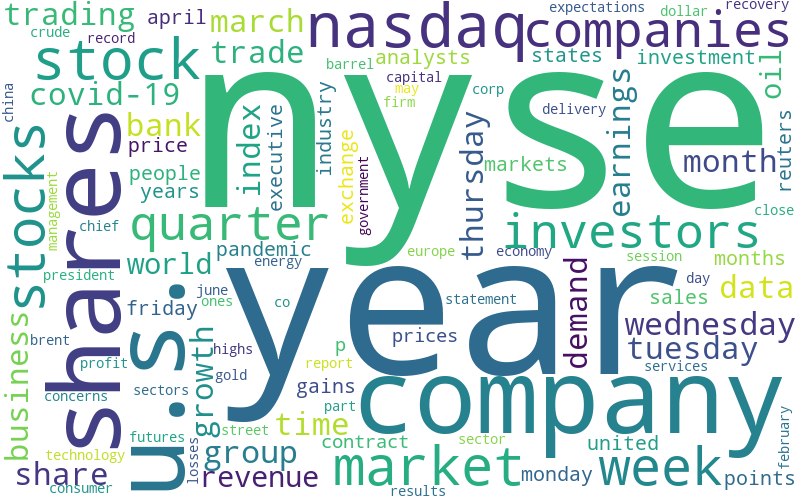

In [ ]:
Image(filename=f"{outcome_folder}/wc1.png")

### Popular Adjectives Representing Emotional Aspects

In [ ]:
counter_adjs = get_counter(df, global_stopwords+local_stopwords, "JJ")
counter_adjs.most_common(50)

[('last', 1448),
 ('new', 1115),
 ('first', 1064),
 ('higher', 865),
 ('global', 745),
 ('high', 624),
 ('due', 609),
 ('lower', 578),
 ('strong', 546),
 ('late', 543),
 ('many', 519),
 ('financial', 490),
 ('best', 489),
 ('economic', 471),
 ('top', 466),
 ('recent', 460),
 ('biggest', 459),
 ('largest', 451),
 ('major', 424),
 ('second', 420),
 ('public', 417),
 ('next', 413),
 ('worst', 410),
 ('past', 408),
 ('european', 396),
 ('pandemic', 392),
 ('unchanged', 391),
 ('current', 380),
 ('chief', 377),
 ('big', 363),
 ('several', 342),
 ('early', 320),
 ('net', 319),
 ('low', 319),
 ('potential', 319),
 ('much', 316),
 ('corporate', 313),
 ('latest', 309),
 ('first-quarter', 293),
 ('likely', 287),
 ('electric', 278),
 ('quarterly', 272),
 ('least', 271),
 ('former', 270),
 ('positive', 265),
 ('third', 258),
 ('chinese', 255),
 ('52-week', 252),
 ('significant', 249),
 ('private', 248)]

형용사를 대상으로 한 키워드 분석에서는 high(er), low(er), last, worst, biggest, largest와 같이 비교하는 표현들이 많이 등장하였음. 

또, 52-week, strong, high, positive 등 최근 많은 기업들이 주가가 상승하며 최고치를 달성하고 있음을 나타내는 단어들이 등장함.

In [ ]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter_adjs)
wc.to_file(f"{outcome_folder}/wc2.png")

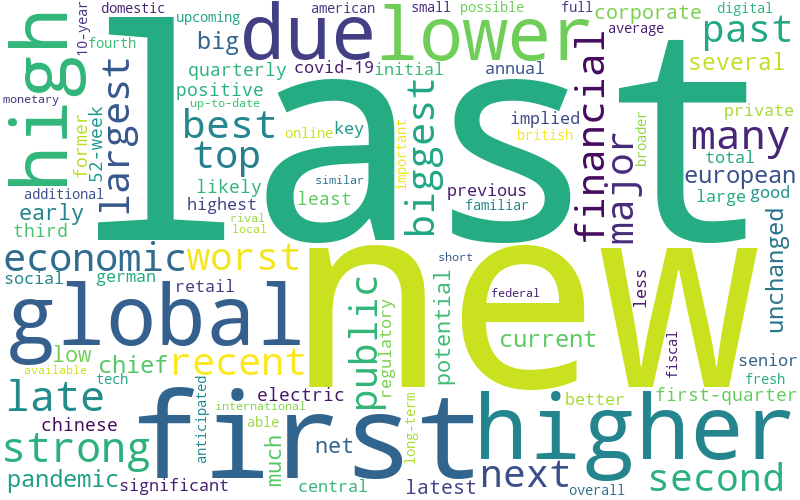

In [ ]:
Image(filename=f"{outcome_folder}/wc2.png")

### Popular Verbs Representing Behavioral Aspects

In [ ]:
counter_verbs = get_counter(df, global_stopwords+local_stopwords, "VB")
counter_verbs.most_common(50)

[('said', 2332),
 ('rose', 1058),
 ('fell', 966),
 ('according', 874),
 ('expected', 850),
 ('reported', 849),
 ('including', 814),
 ('added', 780),
 ('hit', 721),
 ('declined', 670),
 ('led', 661),
 ('rising', 641),
 ('told', 583),
 ('set', 576),
 ('ended', 564),
 ('following', 485),
 ('seen', 480),
 ('announced', 478),
 ('gained', 471),
 ('take', 470),
 ('compared', 469),
 ('make', 439),
 ('end', 437),
 ('made', 435),
 ('lost', 397),
 ('trade', 395),
 ('continue', 393),
 ('raised', 373),
 ('outnumbered', 362),
 ('think', 353),
 ('see', 350),
 ('expects', 336),
 ('given', 317),
 ('going', 317),
 ('get', 312),
 ('helped', 308),
 ('adding', 305),
 ('buy', 301),
 ('come', 293),
 ('showed', 276),
 ('based', 275),
 ('growing', 273),
 ('saying', 270),
 ('comes', 269),
 ('falling', 268),
 ('expect', 263),
 ('say', 262),
 ('help', 259),
 ('stay', 256),
 ('close', 253)]

동사를 대상으로 한 키워드 분석에서는 rise, reported, expected, announced, compared, growing, declined 등 실적 발표 및 전망, 비교와 관련한 단어들이 자주 등장함. 

stopword라고 생각되는 단어를 제외하고 대부분의 단어들이 데이터 분석 및 앞으로의 전망과 관련된 단어들임.

In [ ]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter_verbs)
wc.to_file(f"{outcome_folder}/wc3.png")

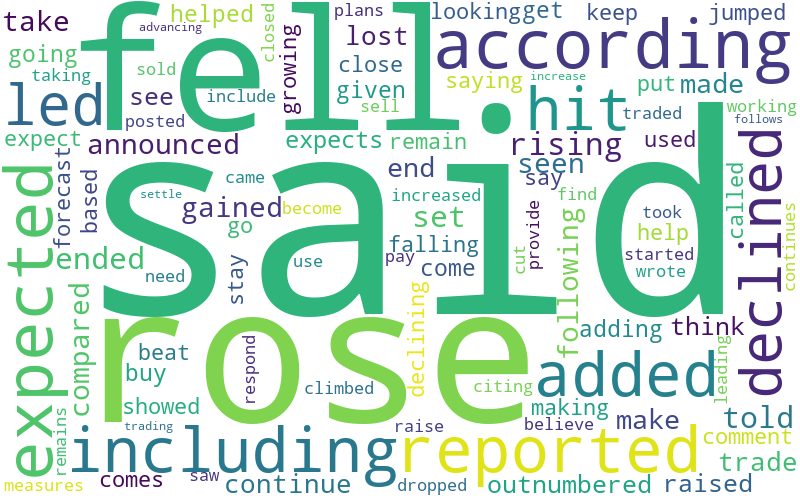

In [ ]:
Image(filename=f"{outcome_folder}/wc3.png")

## Time Series Analysis

In [ ]:
df.datetime.min(), df.datetime.max()

(Timestamp('2021-05-01 00:00:00'), Timestamp('2021-05-06 17:16:00'))

수집된 웹 페이지들이 게재된 기간은 2021년 5월 1일부터 2021년 5월 6일로서 일주일도 안되는 짧은 time range를 가짐. 

짧은 기간임에도 유의미한 결과를 확인할 수 있었음.

In [ ]:
import numpy as np

count = pd.Series(data=1, index=df.datetime).resample(rule="d").count()
count

DATE
2021-05-01    3108
2021-05-02      11
2021-05-03      83
2021-05-04     125
2021-05-05     103
2021-05-06      14
Freq: D, dtype: int64

In [ ]:
count.mean(), count.std()

(574.0, 1242.2759757799392)

일별 게재 건수의 평균은 약 574건, 표준편차는 약 1242건으로서, 표준편차가 매우 큰 것을 확인할 수 있음.

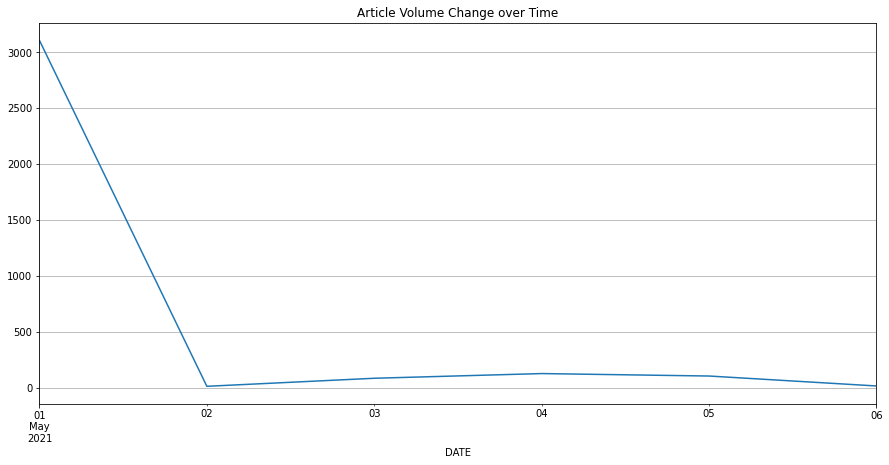

In [ ]:
count.plot(kind="line", title="Article Volume Change over Time", figsize=(15,7), grid=True)

5월 1일에 게재된 기사가 다른 날들에 비해 월등히 많음을 확인할 수 있음.

5월 1일이 토요일이며, 월 초이기 때문에 지난 한 주 또는 지난 달에 대한 분석 기사들이 많이 게재되었음을 알 수 있음. 또한, 많은 기업들의 1분기 실적 발표일이 4월 말이기 때문에 이를 종합적으로 분석한 기사들이 함께 게재되었음을 알 수 있음.

### Peak Day Analysis

In [ ]:
counter_peak = get_counter(df[df.datetime == "2021-05-01"], global_stopwords+local_stopwords)
counter_peak.most_common(30)

[('said', 1598),
 ('year', 1090),
 ('nyse', 1060),
 ('last', 967),
 ('company', 963),
 ('u.s.', 936),
 ('billion', 883),
 ('would', 878),
 ('new', 806),
 ('nasdaq', 734),
 ('companies', 720),
 ('market', 706),
 ('could', 671),
 ('first', 643),
 ('million', 638),
 ('investors', 592),
 ('pandemic', 588),
 ('according', 588),
 ('including', 586),
 ('chief', 583),
 ('covid-19', 574),
 ('two', 570),
 ('global', 570),
 ('shares', 556),
 ('group', 553),
 ('since', 527),
 ('business', 515),
 ('week', 501),
 ('expected', 500),
 ('month', 497)]

실제로 5월 1일에 게재된 글들의 키워드 랭킹을 살펴보면 nasdaq, company, last와 같이 대부분 기업, 주가 분석 및 전망과 관련된 내용임을 알 수 있음.

## Document Clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words=global_stopwords+local_stopwords, max_df=0.7)
X = vectorizer.fit_transform(df.TITLE)

In [ ]:
X.shape

(3444, 5529)

There are 3,444 documents and 5,529 words or features. 

### K-Means Clustering

### Step 1. Choose the number of clusters

In [ ]:
k=4

### Step 2. Initialize a model object for k-means clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans

### Step 3. Fit the model using the input data

In [ ]:
%time kmeans.fit(X)

### Step 4. Examine the clustering outcome

The focus of this step should be on identifying the characteristics of each cluster. 

In [ ]:
kmeans.labels_

In [ ]:
df["cluster"] = kmeans.labels_

In [ ]:
df[["TITLE", "BODY", "cluster"]]

,TITLE,BODY,cluster
0,Air France-KLM operating loss widens as European recovery lags,"Air France-KLM sales are showing little sign so far of a travel upturn it still hopes to see by summer, the airline group said on Thursday, as it ...",0
1,Aston Martin posts smaller loss as sales more than double,Carmaker Aston Martin posted a smaller first quarter loss in 2021 of 42.2 million pounds ($59 million) and said it continued to take steps towards...,0
2,Rebound in trading boosts earnings at France's SocGen,Societe Generale will press ahead with an overhaul of its investment bank after its equities division posted its best performance in six years in ...,0
3,ArcelorMittal reports best start to a year for a decade,"ArcelorMittal, the world's largest steelmaker, reported higher than expected first-quarter earnings on Thursday after what it said was its stronge...",0
4,Britain's Next raises profit outlook for second time in two months,British fashion retailer Next raised its full-year profit guidance for the second time in two months as it reported better than expected first-qua...,0
...,...,...,...
3439,"Tesla raises price of variants of Model Y, Model 3, Model S","Tesla (NASDAQ:TSLA) Inc has increased price of its Model Y Long Range and Model S Plaid plus by $10,000, the electric-car maker's website showed. ...",0
3440,European Stock Futures Higher; ECB Meeting Looms Large,"European stock markets are seen opening marginally higher Thursday, boosted by the final approval of the U.S. Covid-19 stimulus package, but with ...",3
3441,Analysis: Riding GameStop's resurgent rally - 'not for the faint of heart',"Joe Youngblood, who works in digital marketing in Dallas, Texas, bought his first share of GameStop (NYSE:GME) at $98 in early February and found ...",0
3442,HSBC toughens stance on fossil fuel funding after shareholder heat,"HSBC will phase out its support for the coal industry in the developed world by 2030 and in the developing world by 2040, the bank said on Thursda...",0


In [ ]:
count2 = df.cluster.value_counts()
count2

0    2359
3     627
1     312
2     146
Name: cluster, dtype: int64

특정 클러스터에 쏠림 현상이 발생하여 title과 body별로 각각 다양한 개수의 클러스터를 찾아본 결과 title을 선택하여 4개의 클러스터를 찾았을 때 가장 고르게 분포하였음.

In [ ]:
df[df.cluster == count2.index[0]].sample(10, random_state=0)[["TITLE", "BODY", "cluster"]]     # the largest cluster

,TITLE,BODY,cluster
640,CME Group profit drops 25% in first quarter,"Futures exchange operator CME Group Inc (NASDAQ:CME) reported a 25% drop in first-quarter profit, hurt by a decline in sales of some of its top pr...",0
2865,"Zoominfo (No, Not That Zoom) Jumps on Goldman's Multi-Billion Sales Forecast",Zoominfo Technologies Inc (NASDAQ:ZI) -- not to be confused with theZoom Video Communications Inc (NASDAQ:ZM) that we are all way too familiar wit...,0
2150,Southwest recalls 209 pilots as travel demand recovers,"Southwest Airlines has recalled 209 pilots from a voluntary extended leave program to support its summer schedule, the company said on Monday, as ...",0
1078,Lam Research Results Beat in Q3 as Strong Chip Demand Continues,Lam Research (NASDAQ:LRCX) reported Wednesday third-quarter results that beat analysts' forecasts and delivered a brighter outlook for the final q...,0
200,"S&P Dow Jones brings bitcoin, ethereum to Wall St with cryptocurrency indexes","The S&P Dow Jones Indices launched new cryptocurrency indexes, it said on Tuesday, further mainstreaming digital currencies including bitcoin and ...",0
2532,"Investors BlackRock, Vanguard join net zero effort",Top asset managers BlackRock Inc (NYSE:BLK) and Vanguard Group Inc have joined an investor push to limit greenhouse gas emissions to net zero by 2...,0
2531,"Nomura flags $2 billion loss, cancels bond issue; shares plummet","Nomura Holdings Inc on Monday flagged a possible $2 billion loss at a U.S. subsidiary, prompting Japan's biggest brokerage and investment bank to ...",0
2238,Nike wins halt to sales of Lil Nas X 'Satan Shoes',"A federal judge on Thursday sided with Nike Inc (NYSE:NKE) in ordering a Brooklyn company to temporarily stop further sales of ""Satan Shoes"" it ...",0
2084,GM to start making Silverado electric pickups late next year in Detroit: source,General Motors Co (NYSE:GM) is planning to start production of Chevrolet Silverado electric pickup truck late next year at its Detroit-Hamtramck a...,0
1709,India’s Gasoline Use Jumps in March as Cars Preferred,"Gasoline demand in India rose to a four-month high in March as millions of people favored cars over public transport, with one of the world’s most...",0


In [ ]:
counter_max = get_counter(df[df.cluster == count2.index[0]], global_stopwords+local_stopwords)
counter_max.most_common(30)

[('said', 1995),
 ('nyse', 1355),
 ('company', 1341),
 ('year', 1286),
 ('billion', 1147),
 ('last', 1144),
 ('u.s.', 1054),
 ('would', 1022),
 ('nasdaq', 947),
 ('new', 928),
 ('million', 868),
 ('shares', 849),
 ('first', 807),
 ('market', 746),
 ('could', 742),
 ('according', 730),
 ('companies', 715),
 ('including', 685),
 ('chief', 658),
 ('pandemic', 655),
 ('business', 643),
 ('two', 639),
 ('covid-19', 621),
 ('group', 609),
 ('stock', 587),
 ('global', 585),
 ('people', 585),
 ('since', 583),
 ('week', 573),
 ('quarter', 571)]

In [ ]:
df[df.cluster == count2.index[1]].sample(10, random_state=0)[["TITLE", "BODY", "cluster"]]     # the second largest cluster

,TITLE,BODY,cluster
2691,"Infrastructure bill could fuel stocks, but investors temper enthusiasm","A U.S. government plan to upgrade the nation's infrastructure could further fuel the stock market's rally, but skepticism about a massive spending...",3
2964,"Wall Street Opens Lower, Reversing After Fed Ends Bank Loophole; Dow Down 260 Pts","U.S. stock markets headed lower for a second straight day on Friday, reversing overnight gains after the Federal Reserve said it would close a pot...",3
450,3 Buy-Rated Momentum Stocks to Snatch Up Now,"Amid current market volatility, investors are increasingly relying on momentum stocks because they have been able to generate significant returns ...",3
1007,Is Darden Restaurants a Buy?,"Restaurants companies like Darden Restaurants (NYSE:DRI) struggled during the pandemic, but the stock has shown bullish momentum over the past cou...",3
1547,Wall Street ends mixed despite bumper big-bank earnings,"Wall Street indexes closed mixed on Wednesday, with the Nasdaq Composite and S&P 500 falling despite another record intraday high for the latter a...",3
1093,2 Lesser-Known Semiconductor Stocks to Buy as Chip Prices Soar,The demand for semiconductors has increased amid the COVID-19 pandemic because of the lifestyle and business changes it has fostered. The world is...,3
1450,Is it Time to Buy the Dip on Chewy?,"Chewy (NYSE:CHWY) is a leading e-commerce company, specializing in pet care. It has remarkable growth and customer loyalty. Andy Hecht makes his c...",3
2710,S&P 500 slips as tech stocks pull market lower,The S&P 500 closed lower on Wednesday as optimism about the economic recovery by Federal Reserve Chair Jerome Powell and Treasury Secretary Janet ...,3
1298,Wall Street Opens Lower; Tesla Slides on Double Blow; Dow Down 110 Pts,"U.S. stock markets opened lower on Monday, consolidating in the absence of major news after hitting successive record highs last week. Market sent...",3
1734,S&P 500 Closes Just Below All-Time High as Investors Await Earnings,"The S&P 500 closed just below a record high Monday, but struggled for direction as investors awaited guidance from the start of quarterly earnings...",3


In [ ]:
counter_max = get_counter(df[df.cluster == count2.index[1]], global_stopwords+local_stopwords)
counter_max.most_common(30)

[('stocks', 468),
 ('nyse', 406),
 ('nasdaq', 397),
 ('u.s.', 396),
 ('investors', 363),
 ('year', 361),
 ('market', 350),
 ('said', 331),
 ('growth', 331),
 ('expected', 330),
 ('higher', 320),
 ('last', 302),
 ('stock', 302),
 ('rose', 301),
 ('economic', 292),
 ('week', 289),
 ('data', 287),
 ('covid-19', 286),
 ('fell', 281),
 ('p', 274),
 ('500', 271),
 ('global', 270),
 ('high', 267),
 ('prices', 265),
 ('companies', 259),
 ('recovery', 257),
 ('gains', 251),
 ('demand', 247),
 ('economy', 247),
 ('new', 245)]

첫번째 클러스터와 두번째 클러스터는 크게 구분되는 특징을 발견하지 못함.

In [ ]:
df[df.cluster == count2.index[2]].sample(10, random_state=0)[["TITLE", "BODY", "cluster"]]

,TITLE,BODY,cluster
888,U.S. stocks higher at close of trade; Dow Jones Industrial Average up 0.67%,"U.S. stocks were higher after the close on Friday, as gains in the Basic Materials, Technology and Financials sectors led shares higher. At the cl...",1
2642,Germany stocks mixed at close of trade; DAX up 0.08%,"Germany stocks were mixed after the close on Thursday, as gains in the Utilities, Chemicals and Transportation & Logistics sectors led shares high...",1
2240,U.S. stocks higher at close of trade; Dow Jones Industrial Average up 0.52%,"U.S. stocks were higher after the close on Thursday, as gains in the Oil & Gas, Technology and Financials sectors led shares higher. At the close ...",1
2363,Japan stocks lower at close of trade; Nikkei 225 down 0.86%,"Japan stocks were lower after the close on Wednesday, as losses in the Paper & Pulp, Railway & Bus and Real Estate sectors led shares lower. At th...",1
1385,Germany stocks higher at close of trade; DAX up 1.34%,"Germany stocks were higher after the close on Friday, as gains in the Industrials, Retail and Chemicals sectors led shares higher. At the close in...",1
2770,Japan stocks lower at close of trade; Nikkei 225 down 2.04%,"Japan stocks were lower after the close on Wednesday, as losses in the Paper & Pulp, Railway & Bus and Real Estate sectors led shares lower. At th...",1
1679,Saudi Arabia stocks lower at close of trade; Tadawul All Share down 0.70%,"Saudi Arabia stocks were lower after the close on Tuesday, as losses in the Retail, Telecoms & IT and Building & Construction sectors led shares l...",1
1467,France stocks higher at close of trade; CAC 40 up 0.41%,"France stocks were higher after the close on Thursday, as gains in the Foods & Drugs, Gas & Water and General Financial sectors led shares higher....",1
993,France stocks higher at close of trade; CAC 40 up 0.91%,"France stocks were higher after the close on Thursday, as gains in the Foods & Drugs, Gas & Water and General Financial sectors led shares higher....",1
2974,India stocks higher at close of trade; Nifty 50 up 1.28%,"India stocks were higher after the close on Friday, as gains in the Power, Fast Moving Consumer Goods and Metals sectors led shares higher. At the...",1


In [ ]:
counter_min = get_counter(df[df.cluster == count2.index[2]], global_stopwords+local_stopwords)
counter_min.most_common(30)

[('oil', 312),
 ('shares', 312),
 ('stocks', 312),
 ('close', 312),
 ('ounce', 312),
 ('dollar', 312),
 ('performers', 312),
 ('index', 312),
 ('session', 312),
 ('rose', 312),
 ('barrel', 312),
 ('gold', 312),
 ('futures', 312),
 ('late', 312),
 ('troy', 312),
 ('led', 312),
 ('trading', 312),
 ('fell', 312),
 ('delivery', 312),
 ('ones', 312),
 ('exchange', 312),
 ('elsewhere', 312),
 ('us', 312),
 ('crude', 312),
 ('points', 312),
 ('meanwhile', 312),
 ('trade', 312),
 ('stock', 312),
 ('worst', 312),
 ('commodities', 312)]

세번째 클러스터는 oil, ounce, barrel, curde 등의 키워드를 포함. 원유와 관련된 기사들이 주를 이룸.

In [ ]:
df[df.cluster == count2.index[-1]].sample(10, random_state=0)[["TITLE", "BODY", "cluster"]]     # the smallest cluster 

,TITLE,BODY,cluster
138,"Verisk Earnings, Revenue Miss in Q1",Verisk (NASDAQ:VRSK) reported on Tuesday first quarter earnings that missed analysts' forecasts and revenue that fell short of expectations. Veri...,2
396,"Exxon Mobil Earnings, Revenue Beat in Q1",Exxon Mobil (NYSE:XOM) reported on Friday first quarter earnings that beat analysts' forecasts and revenue that topped expectations. Exxon Mobil...,2
404,"Chevron Earnings Beat, Revenue Misses In Q1",Chevron (NYSE:CVX) reported on Friday first quarter earnings that beat analysts' forecasts and revenue that fell short of expectations. Chevron ...,2
1318,"Coca-Cola Earnings, Revenue Beat in Q1",Coca-Cola (NYSE:KO) reported on Monday first quarter earnings that beat analysts' forecasts and revenue that topped expectations. Coca-Cola annou...,2
3049,"Accenture Earnings Beat, Revenue Misses In Q2",Accenture (NYSE:ACN) reported on Thursday second quarter earnings that beat analysts' forecasts and revenue that fell short of expectations. Acce...,2
540,"Thermo Fisher Scientific Earnings, Revenue Beat in Q1",Thermo Fisher Scientific (NYSE:TMO) reported on Thursday first quarter earnings that beat analysts' forecasts and revenue that topped expectation...,2
523,"Kraft Heinz Earnings, Revenue Beat in Q1",Kraft Heinz (NASDAQ:KHC) reported on Thursday first quarter earnings that beat analysts' forecasts and revenue that topped expectations. Kraft He...,2
389,"Illinois Tool Works Earnings, Revenue Beat in Q1",Illinois Tool Works (NYSE:ITW) reported on Friday first quarter earnings that beat analysts' forecasts and revenue that topped expectations. Illi...,2
1221,"Lockheed Martin Earnings Beat, Revenue Misses In Q1",Lockheed Martin (NYSE:LMT) reported on Tuesday first quarter earnings that beat analysts' forecasts and revenue that fell short of expectations....,2
401,"Colgate-Palmolive Earnings, Revenue Beat in Q1",Colgate-Palmolive (NYSE:CL) reported on Friday first quarter earnings that beat analysts' forecasts and revenue that topped expectations. Colgate...,2


In [ ]:
counter_min = get_counter(df[df.cluster == count2.index[-1]], global_stopwords+local_stopwords)
counter_min.most_common(30)

[('revenue', 146),
 ('analysts', 145),
 ('share', 145),
 ('per', 145),
 ('reported', 145),
 ('eps', 145),
 ('expectations', 144),
 ('anticipated', 144),
 ('earnings', 144),
 ('polled', 144),
 ('investing.com', 144),
 ('quarter', 144),
 ('announced', 144),
 ('upcoming', 142),
 ('up-to-date', 142),
 ('calendar', 142),
 ('stay', 142),
 ('reports', 142),
 ('visiting', 142),
 ('year', 142),
 ('beat', 140),
 ('shares', 139),
 ('report', 139),
 ('compared', 138),
 ('forecasts', 138),
 ('forecast', 138),
 ('start', 137),
 ('52', 137),
 ('still', 137),
 ('beginning', 136)]

가장 작은 클러스터는 1분기 실적에 대한 분석 및 예측에 관한 내용임.

## Topic Modeling

### Step 1. Choose the number of topics

In [ ]:
num_topics = 3

### Step 2. Initialize a model object for LDA topic modeling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=num_topics, random_state=0)     # LDA uses randomness to get a probability distribution
lda

### Step 3. Fit the model using the input data

In [ ]:
%time lda.fit(X)

### Step 4. Examine the output of topic modeling

In [ ]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("*** Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [ ]:
show_topics(lda, vectorizer.get_feature_names(), 10)

### Topic Model Visualization

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.064909  0.073691       1        1  38.158120
2     -0.053394 -0.078633       2        1  34.422855
1      0.118304  0.004942       3        1  27.419025, topic_info=          Term       Freq      Total Category  logprob  loglift
1099     close  48.000000  48.000000  Default  30.0000  30.0000
5044     trade  48.000000  48.000000  Default  29.0000  29.0000
4159   revenue  32.000000  32.000000  Default  28.0000  28.0000
3885        q1  28.000000  28.000000  Default  27.0000  27.0000
611       beat  27.000000  27.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1668  earnings  28.805704  39.648109   Topic3  -4.4959   0.9745
2426    higher  28.450536  39.590001   Topic3  -4.5084   0.9635
3007     lower  22.482226  30.331336   Topic3  -4.7438   0.9945
4713    stocks  40.221670  73.140720   Topic3  -4.1621   0.6960
1610       dow  11.155379  20.240363   Topic3  -5.4446   0.6982

[174 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
12        2  0.867615       10
41        3  0.986118       20
42        3  0.975824      200
49        2  0.752788     2021
49        3  0.188197     2021
...     ...       ...      ...
5354      2  0.892249    warns
5390      1  0.972779     week
5457      2  0.956983     wood
5473      1  0.976359  worries
5510      1  0.882620   yields

[213 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

토픽 분석은 예상과는 다르게 고르게, 그리고 잘 구분되어 나타남. 토픽은 지역을 기준으로 나누어져 있는 것을 확인할 수 있음. 크게 미국 증시, 중동 및 유럽 증시, 아시아 증시로 구분되어 있음.